In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('sensor-data.csv')

In [3]:
sensor_names = {
'sensor_00': 'Motor Casing Vibration',
'sensor_01': 'Motor Frequency A',
'sensor_02': 'Motor Frequency B',
'sensor_03': 'Motor Frequency C',
'sensor_04': 'Motor Speed',
'sensor_05': 'Motor Current',
'sensor_06': 'Motor Active Power',
'sensor_07': 'Motor Apparent Power',
'sensor_08': 'Motor Reactive Power',
'sensor_09': 'Motor Shaft Power',
'sensor_10': 'Motor Phase Current A',
'sensor_11': 'Motor Phase Current B',
'sensor_12': 'Motor Phase Current C',
'sensor_13': 'Motor Coupling Vibration',
'sensor_14': 'Motor Phase Voltage AB',
'sensor_16': 'Motor Phase Voltage BC',
'sensor_17': 'Motor Phase Voltage CA',
'sensor_18': 'Pump Casing Vibration',
'sensor_19': 'Pump Stage 1 Impeller Speed_1',
'sensor_20': 'Pump Stage 1 Impeller Speed_2',
'sensor_21': 'Pump Stage 1 Impeller Speed_3',       
'sensor_22': 'Pump Stage 1 Impeller Speed_4',
'sensor_23': 'Pump Stage 1 Impeller Speed_5',
'sensor_24': 'Pump Stage 1 Impeller Speed_6',
'sensor_25': 'Pump Stage 2 Impeller Speed_1',
'sensor_26': 'Pump Stage 2 Impeller Speed_2',
'sensor_27': 'Pump Stage 2 Impeller Speed_3',
'sensor_28': 'Pump Stage 2 Impeller Speed_4',
'sensor_29': 'Pump Stage 2 Impeller Speed_5',
'sensor_30': 'Pump Stage 2 Impeller Speed_6',
'sensor_31': 'Pump Stage 2 Impeller Speed_7',
'sensor_32': 'Pump Stage 2 Impeller Speed_8',
'sensor_33': 'Pump Stage 2 Impeller Speed_9',
'sensor_34': 'Pump Inlet Flow',
'sensor_35': 'Pump Discharge Flow',
'sensor_36': 'Pump UNKNOWN',
'sensor_37': 'Pump Lube Oil Overhead Reservoir Level',
'sensor_38': 'Pump Lube Oil Return Temp',
'sensor_39': 'Pump Lube Oil Supply Temp',
'sensor_40': 'Pump Thrust Bearing Active Temp',
'sensor_41': 'Motor Non Drive End Radial Bearing Temp 1',
'sensor_42': 'Motor Non Drive End Radial Bearing Temp 2',
'sensor_43': 'Pump Thrust Bearing Inactive Temp',
'sensor_44': 'Pump Drive End Radial Bearing Temp 1',
'sensor_45': 'Pump non Drive End Radial Bearing Temp 1',
'sensor_46': 'Pump Non Drive End Radial Bearing Temp 2',
'sensor_47': 'Pump Drive End Radial Bearing Temp 2',
'sensor_48': 'Pump Inlet Pressure',
'sensor_49': 'Pump Temp Unknown',
'sensor_50': 'Pump Discharge Pressure 1',
'sensor_51': 'Pump Discharge Pressure 2'
}
df.rename(columns=sensor_names,inplace=True)
df['timestamp']=pd.to_datetime(df['timestamp'])
df['month']=df['timestamp'].dt.month
df['day']=df['timestamp'].dt.day
df['minute']=df['timestamp'].dt.minute
df['hour']=df['timestamp'].dt.hour
df['machine_status'] = df['machine_status'].replace({'NORMAL': 0, 'BROKEN': 1,'RECOVERING': 0.5}) 
df.fillna(0,inplace=True)
df.drop(columns=['timestamp','Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.columns

Index(['Motor Casing Vibration', 'Motor Frequency A', 'Motor Frequency B',
       'Motor Frequency C', 'Motor Speed', 'Motor Current',
       'Motor Active Power', 'Motor Apparent Power', 'Motor Reactive Power',
       'Motor Shaft Power', 'Motor Phase Current A', 'Motor Phase Current B',
       'Motor Phase Current C', 'Motor Coupling Vibration',
       'Motor Phase Voltage AB', 'sensor_15', 'Motor Phase Voltage BC',
       'Motor Phase Voltage CA', 'Pump Casing Vibration',
       'Pump Stage 1 Impeller Speed_1', 'Pump Stage 1 Impeller Speed_2',
       'Pump Stage 1 Impeller Speed_3', 'Pump Stage 1 Impeller Speed_4',
       'Pump Stage 1 Impeller Speed_5', 'Pump Stage 1 Impeller Speed_6',
       'Pump Stage 2 Impeller Speed_1', 'Pump Stage 2 Impeller Speed_2',
       'Pump Stage 2 Impeller Speed_3', 'Pump Stage 2 Impeller Speed_4',
       'Pump Stage 2 Impeller Speed_5', 'Pump Stage 2 Impeller Speed_6',
       'Pump Stage 2 Impeller Speed_7', 'Pump Stage 2 Impeller Speed_8',
       'P

In [5]:
thresholds = {
    'Motor Casing Vibration': (0.0, 2.5),
    'Motor Frequency A': (47.51, 48.51),
    'Motor Frequency B': (49.86, 51.86),
    'Motor Frequency C': (42.75, 44.75),
    'Motor Speed': (531.56, 649.44),
    'Motor Current': (0, 79.99),
    'Motor Active Power': (0, 17.80)
}
def check_sensor_condition(sensor_value, sensor_name):
    lower_threshold, upper_threshold = thresholds[sensor_name]
    return lower_threshold <= sensor_value <= upper_threshold
for sensor_name in thresholds:
    df[sensor_name + '_Status'] = df[sensor_name].apply(lambda x: 0 if check_sensor_condition(x, sensor_name) else 1)

In [6]:
target_sensors = ['Motor Casing Vibration_Status', 'Motor Frequency A_Status', 'Motor Frequency B_Status', 'Motor Frequency C_Status', 'Motor Speed_Status', 'Motor Current_Status', 'Motor Active Power_Status']
features = df.drop(columns=target_sensors, axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, df[target_sensors], test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
for sensor in target_sensors:
    mean_value = df[sensor].mean()
    max_value = df[sensor].max()
    print(f'{sensor}: Mean = {mean_value}, Max = {max_value}')

Motor Casing Vibration_Status: Mean = 0.2327977487291213, Max = 1
Motor Frequency A_Status: Mean = 0.8159767610748003, Max = 1
Motor Frequency B_Status: Mean = 0.6295797022512709, Max = 1
Motor Frequency C_Status: Mean = 0.5980982207697894, Max = 1
Motor Speed_Status: Mean = 0.09284676833696441, Max = 1
Motor Current_Status: Mean = 0.28841230936819173, Max = 1
Motor Active Power_Status: Mean = 0.00041303558460421206, Max = 1


In [8]:
Final_Normal_List = []
Final_Broken_List = []

In [9]:
# cell execution time: 4m 39.5s
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:-7]  # Remove '_Status' from the name
    print(f"--- Evaluation for {sensor_name} ---")
    print(f"Classification Report:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))
    print(f"Accuracy: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test.iloc[:, i], y_pred[:, i])}\n")
normal_sensors = []
broken_sensors = []
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:]  
    if (y_pred[:, i] == 0).sum() > (y_pred[:, i] == 1).sum():
        normal_sensors.append(sensor_name)
    else:
        broken_sensors.append(sensor_name)
print(f"Normal: {normal_sensors}")
print(f"Broken: {broken_sensors}")
rfc_list_normal = []
rfc_list_broken = []
rfc_list_normal.append(normal_sensors) 
rfc_list_broken.append(broken_sensors)

--- Evaluation for Motor Casing Vibration ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33820
           1       1.00      1.00      1.00     10244

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 0.9999773057371096
Confusion Matrix:
 [[33820     0]
 [    1 10243]]

--- Evaluation for Motor Frequency A ---
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8131
           1       1.00      1.00      1.00     35933

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 0.9975717138707335
Confusion Matrix:
 [[ 8088    43]
 [   64 35869]]

--- Evaluation for Motor Frequency B ---
Classifica

In [10]:
# cell execution time: 15.7s
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:-7]  # Remove '_Status' from the name
    print(f"--- Evaluation for {sensor_name} ---")
    print(f"Classification Report:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))
    print(f"Accuracy: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test.iloc[:, i], y_pred[:, i])}\n")
normal_sensors = []
broken_sensors = []
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:]  
    if (y_pred[:, i] == 0).sum() > (y_pred[:, i] == 1).sum():
        normal_sensors.append(sensor_name)
    else:
        broken_sensors.append(sensor_name)
print(f"Normal: {normal_sensors}")
print(f"Broken: {broken_sensors}") 
dtc_list_normal = []
dtc_list_broken = []
dtc_list_normal.append(normal_sensors)
dtc_list_broken.append(broken_sensors)

--- Evaluation for Motor Casing Vibration ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33820
           1       1.00      1.00      1.00     10244

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 1.0
Confusion Matrix:
 [[33820     0]
 [    0 10244]]

--- Evaluation for Motor Frequency A ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8131
           1       1.00      1.00      1.00     35933

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 0.9995007262164125
Confusion Matrix:
 [[ 8118    13]
 [    9 35924]]

--- Evaluation for Motor Frequency B ---
Classification Report:
  

In [11]:
# cell execution time: 31.8s
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
normal_sensors = []
broken_sensors = []
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:]  
    if (y_pred[:, i] == 0).sum() > (y_pred[:, i] == 1).sum():
        normal_sensors.append(sensor_name)
    else:
        broken_sensors.append(sensor_name)

print(f"Normal: {normal_sensors}")
print(f"Broken: {broken_sensors}") 
knn_list_normal = []
knn_list_broken = []
knn_list_normal.append(normal_sensors)
knn_list_broken.append(broken_sensors)
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:-7]  # Remove '_Status' from the name
    print(f"--- Evaluation for {sensor_name} ---")
    print(f"Classification Report:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))
    print(f"Accuracy: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test.iloc[:, i], y_pred[:, i])}\n")

Normal: ['Motor Casing Vibration_Status', 'Motor Speed_Status', 'Motor Current_Status', 'Motor Active Power_Status']
Broken: ['Motor Frequency A_Status', 'Motor Frequency B_Status', 'Motor Frequency C_Status']
--- Evaluation for Motor Casing Vibration ---
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95     33820
           1       0.83      0.88      0.85     10244

    accuracy                           0.93     44064
   macro avg       0.90      0.91      0.90     44064
weighted avg       0.93      0.93      0.93     44064

Accuracy: 0.9299428104575164
Confusion Matrix:
 [[32005  1815]
 [ 1272  8972]]

--- Evaluation for Motor Frequency A ---
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      8131
           1       0.99      0.99      0.99     35933

    accuracy                           0.98     44064
   macro avg       0.97      0

In [12]:
Final_Normal_sensors = [sensor for sensor in rfc_list_normal if sensor in dtc_list_normal and sensor in knn_list_normal]
Final_Broken_sensors = [sensor for sensor in rfc_list_broken if sensor in dtc_list_broken and sensor in knn_list_broken]
def clean_sensor_names(sensor_list):
    return [[sensor.replace('_Status', '') for sensor in sublist] for sublist in sensor_list]
print("Final Normal Sensors: ",clean_sensor_names(Final_Normal_sensors))
print("Final Broken Sensors: ",clean_sensor_names(Final_Broken_sensors))
Final_Normal_List.append(Final_Normal_sensors)
Final_Broken_List.append(Final_Broken_sensors)

Final Normal Sensors:  [['Motor Casing Vibration', 'Motor Speed', 'Motor Current', 'Motor Active Power']]
Final Broken Sensors:  [['Motor Frequency A', 'Motor Frequency B', 'Motor Frequency C']]


Step - 2

In [13]:
thresholds = {
    'Motor Apparent Power': (14.88, 21.24),
    'Motor Reactive Power': (19.48, 21.91),
    'Motor Shaft Power': (14.00,20.00),
    'Motor Phase Current A': (60.89, 68.50),
    'Motor Phase Current B': (48.00, 54.00),
    'Motor Phase Current C': (28.00,36.00),
    'Motor Coupling Vibration': (24.95, 28.07)
}
def check_sensor_condition(sensor_value, sensor_name):
    lower_threshold, upper_threshold = thresholds[sensor_name]
    return lower_threshold <= sensor_value <= upper_threshold
for sensor_name in thresholds:
    df[sensor_name + '_Status'] = df[sensor_name].apply(lambda x: 0 if check_sensor_condition(x, sensor_name) else 1)

In [14]:
target_sensors = ['Motor Apparent Power_Status', 'Motor Reactive Power_Status','Motor Shaft Power_Status', 'Motor Phase Current A_Status', 'Motor Phase Current B_Status','Motor Phase Current C_Status', 'Motor Coupling Vibration_Status']
features = df.drop(columns=target_sensors, axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, df[target_sensors], test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
for sensor in target_sensors:
    mean_value = df[sensor].mean()
    max_value = df[sensor].max()
    print(f'{sensor}: Mean = {mean_value}, Max = {max_value}')

Motor Apparent Power_Status: Mean = 0.06830519244734931, Max = 1
Motor Reactive Power_Status: Mean = 0.9986111111111111, Max = 1
Motor Shaft Power_Status: Mean = 0.06681644880174292, Max = 1
Motor Phase Current A_Status: Mean = 0.9993872549019608, Max = 1
Motor Phase Current B_Status: Mean = 0.7035357661583151, Max = 1
Motor Phase Current C_Status: Mean = 0.3895016339869281, Max = 1
Motor Coupling Vibration_Status: Mean = 0.999931917211329, Max = 1


In [17]:
# cell execution time 4m 32.8s
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:-7]  
    print(f"--- Evaluation for {sensor_name} ---")
    print(f"Classification Report:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))
    print(f"Accuracy: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test.iloc[:, i], y_pred[:, i])}\n")
normal_sensors = []
broken_sensors = []
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:]  
    if (y_pred[:, i] == 0).sum() > (y_pred[:, i] == 1).sum():
        normal_sensors.append(sensor_name)
    else:
        broken_sensors.append(sensor_name)
print(f"Normal: {normal_sensors}")
print(f"Broken: {broken_sensors}")
rfc_list_normal = []
rfc_list_broken = []
rfc_list_normal.append(normal_sensors)
rfc_list_broken.append(broken_sensors)

--- Evaluation for Motor Apparent Power ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     41143
           1       1.00      1.00      1.00      2921

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 0.9999092229484386
Confusion Matrix:
 [[41143     0]
 [    4  2917]]

--- Evaluation for Motor Reactive Power ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00     44004

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 1.0
Confusion Matrix:
 [[   60     0]
 [    0 44004]]

--- Evaluation for Motor Shaft Power ---
Classification Report:
 

In [ ]:
# cell execution time: 15.7s
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:-7]  # Remove '_Status' from the name
    print(f"--- Evaluation for {sensor_name} ---")
    print(f"Classification Report:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))
    print(f"Accuracy: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test.iloc[:, i], y_pred[:, i])}\n")
normal_sensors = []
broken_sensors = []
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:]  
    if (y_pred[:, i] == 0).sum() > (y_pred[:, i] == 1).sum():
        normal_sensors.append(sensor_name)
    else:
        broken_sensors.append(sensor_name)
print(f"Normal: {normal_sensors}")
print(f"Broken: {broken_sensors}") 
dtc_list_normal = []
dtc_list_broken = []
dtc_list_normal.append(normal_sensors)
dtc_list_broken.append(broken_sensors)

--- Evaluation for Motor Apparent Power ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     41143
           1       1.00      1.00      1.00      2921

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 0.9999546114742193
Confusion Matrix:
 [[41142     1]
 [    1  2920]]

--- Evaluation for Motor Reactive Power ---
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      1.00      1.00     44004

    accuracy                           1.00     44064
   macro avg       0.99      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 0.9999773057371096
Confusion Matrix:
 [[   60     0]
 [    1 44003]]

--- Evaluation for Motor Shaft Power ---
Classific

In [ ]:
# cell execution time: 31.8s
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:-7] 
    print(f"--- Evaluation for {sensor_name} ---")
    print(f"Classification Report:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))
    print(f"Accuracy: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test.iloc[:, i], y_pred[:, i])}\n")
normal_sensors = []
broken_sensors = []
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:]  
    if (y_pred[:, i] == 0).sum() > (y_pred[:, i] == 1).sum():
        normal_sensors.append(sensor_name)
    else:
        broken_sensors.append(sensor_name)
print(f"Normal: {normal_sensors}")
print(f"Broken: {broken_sensors}")
knn_list_normal = []
knn_list_broken = []
knn_list_normal.append(normal_sensors)
knn_list_broken.append(broken_sensors)

--- Evaluation for Motor Apparent Power ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     41143
           1       1.00      1.00      1.00      2921

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 0.9997049745824256
Confusion Matrix:
 [[41137     6]
 [    7  2914]]

--- Evaluation for Motor Reactive Power ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00     44004

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 1.0
Confusion Matrix:
 [[   60     0]
 [    0 44004]]

--- Evaluation for Motor Shaft Power ---
Classification Report:
 

In [ ]:
Final_Normal_sensors = [sensor for sensor in rfc_list_normal if sensor in dtc_list_normal and sensor in knn_list_normal]
Final_Broken_sensors = [sensor for sensor in rfc_list_broken if sensor in dtc_list_broken and sensor in knn_list_broken]
def clean_sensor_names(sensor_list):
    return [[sensor.replace('_Status', '') for sensor in sublist] for sublist in sensor_list]
print("Final Normal Sensors: ",clean_sensor_names(Final_Normal_sensors))
print("Final Broken Sensors: ",clean_sensor_names(Final_Broken_sensors))
Final_Normal_List.append(Final_Normal_sensors)
Final_Broken_List.append(Final_Broken_sensors)

Final Normal Sensors:  [['Motor Apparent Power', 'Motor Shaft Power', 'Motor Phase Current C']]
Final Broken Sensors:  [['Motor Reactive Power', 'Motor Phase Current A', 'Motor Phase Current B', 'Motor Coupling Vibration']]


Step - 3

In [ ]:
thresholds = {
    'Motor Phase Voltage AB': (400.00, 450.00),  # 80% and 90% of max
    'Motor Phase Voltage BC': (591.79, 665.77),  # 80% and 90% of max
    'Motor Phase Voltage CA': (480.00, 540.00),  # 80% and 90% of max
    'Pump Casing Vibration': (3.90, 4.39),       # 80% and 90% of max
    'Pump Stage 1 Impeller Speed_1': (703.13, 791.03),  # 80% and 90% of max
    'Pump Stage 1 Impeller Speed_2': (359.13, 403.02),  # 80% and 90% of max
    'Pump Stage 1 Impeller Speed_3': (886.02, 996.77)   # 80% and 90% of max
}
def check_sensor_condition(sensor_value, sensor_name):
    lower_threshold, upper_threshold = thresholds[sensor_name]
    return lower_threshold <= sensor_value <= upper_threshold
for sensor_name in thresholds:
    df[sensor_name + '_Status'] = df[sensor_name].apply(lambda x: 0 if check_sensor_condition(x, sensor_name) else 1)

In [ ]:
# skipped column sensor_15 due to rename issue
target_sensors = ['Motor Phase Voltage AB_Status', 'Motor Phase Voltage BC_Status','Motor Phase Voltage CA_Status', 'Pump Casing Vibration_Status','Pump Stage 1 Impeller Speed_1_Status','Pump Stage 1 Impeller Speed_2_Status','Pump Stage 1 Impeller Speed_3_Status']
features = df.drop(columns=target_sensors, axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, df[target_sensors], test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
for sensor in target_sensors:
    mean_value = df[sensor].mean()
    max_value = df[sensor].max()
    print(f'{sensor}: Mean = {mean_value}, Max = {max_value}')

Motor Phase Voltage AB_Status: Mean = 0.14702251270878722, Max = 1
Motor Phase Voltage BC_Status: Mean = 0.9993963326071169, Max = 1
Motor Phase Voltage CA_Status: Mean = 0.9631263616557734, Max = 1
Pump Casing Vibration_Status: Mean = 0.9929148511256355, Max = 1
Pump Stage 1 Impeller Speed_1_Status: Mean = 0.9976488743645606, Max = 1
Pump Stage 1 Impeller Speed_2_Status: Mean = 0.18053286129266521, Max = 1
Pump Stage 1 Impeller Speed_3_Status: Mean = 0.9226171023965142, Max = 1


In [ ]:
# cell execution time 4m 32.8s
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:-7]  # Remove '_Status' from the name
    print(f"--- Evaluation for {sensor_name} ---")
    print(f"Classification Report:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))
    print(f"Accuracy: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test.iloc[:, i], y_pred[:, i])}\n")
normal_sensors = []
broken_sensors = []
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:]  
    if (y_pred[:, i] == 0).sum() > (y_pred[:, i] == 1).sum():
        normal_sensors.append(sensor_name)
    else:
        broken_sensors.append(sensor_name)
print(f"Normal: {normal_sensors}")
print(f"Broken: {broken_sensors}")
rfc_list_normal = []
rfc_list_broken = []
rfc_list_normal.append(normal_sensors) 
rfc_list_broken.append(broken_sensors)

--- Evaluation for Motor Phase Voltage AB ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     37702
           1       1.00      1.00      1.00      6362

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 0.9997957516339869
Confusion Matrix:
 [[37699     3]
 [    6  6356]]

--- Evaluation for Motor Phase Voltage BC ---
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.77      0.84        35
           1       1.00      1.00      1.00     44029

    accuracy                           1.00     44064
   macro avg       0.97      0.89      0.92     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 0.9997730573710966
Confusion Matrix:
 [[   27     8]
 [    2 44027]]

--- Evaluation for Motor Phase Voltage CA ---


In [ ]:
# cell execution time: 9.0s
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:-7]  # Remove '_Status' from the name
    print(f"--- Evaluation for {sensor_name} ---")
    print(f"Classification Report:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))
    print(f"Accuracy: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test.iloc[:, i], y_pred[:, i])}\n")
normal_sensors = []
broken_sensors = []
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:]  
    if (y_pred[:, i] == 0).sum() > (y_pred[:, i] == 1).sum():
        normal_sensors.append(sensor_name)
    else:
        broken_sensors.append(sensor_name)
print(f"Normal: {normal_sensors}")
print(f"Broken: {broken_sensors}")
dtc_list_normal = []
dtc_list_broken = []
dtc_list_normal.append(normal_sensors)
dtc_list_broken.append(broken_sensors)

--- Evaluation for Motor Phase Voltage AB ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     37702
           1       1.00      1.00      1.00      6362

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 0.9998638344226579
Confusion Matrix:
 [[37698     4]
 [    2  6360]]

--- Evaluation for Motor Phase Voltage BC ---
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        35
           1       1.00      1.00      1.00     44029

    accuracy                           1.00     44064
   macro avg       0.91      0.93      0.92     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 0.9997276688453159
Confusion Matrix:
 [[   30     5]
 [    7 44022]]

--- Evaluation for Motor Phase Voltage CA ---


In [ ]:
# cell execution time: 31.8s
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:-7]  # Remove '_Status' from the name
    print(f"--- Evaluation for {sensor_name} ---")
    print(f"Classification Report:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))
    print(f"Accuracy: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test.iloc[:, i], y_pred[:, i])}\n")
normal_sensors = []
broken_sensors = []
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:]  
    if (y_pred[:, i] == 0).sum() > (y_pred[:, i] == 1).sum():
        normal_sensors.append(sensor_name)
    else:
        broken_sensors.append(sensor_name)
print(f"Normal: {normal_sensors}")
print(f"Broken: {broken_sensors}")
knn_list_normal = []
knn_list_broken = []
knn_list_normal.append(normal_sensors)
knn_list_broken.append(broken_sensors)

--- Evaluation for Motor Phase Voltage AB ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     37702
           1       0.98      0.97      0.98      6362

    accuracy                           0.99     44064
   macro avg       0.99      0.98      0.99     44064
weighted avg       0.99      0.99      0.99     44064

Accuracy: 0.9936683006535948
Confusion Matrix:
 [[37604    98]
 [  181  6181]]

--- Evaluation for Motor Phase Voltage BC ---
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.69      0.75        35
           1       1.00      1.00      1.00     44029

    accuracy                           1.00     44064
   macro avg       0.91      0.84      0.87     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 0.9996368917937546
Confusion Matrix:
 [[   24    11]
 [    5 44024]]

--- Evaluation for Motor Phase Voltage CA ---


In [ ]:
Final_Normal_sensors = [sensor for sensor in rfc_list_normal if sensor in dtc_list_normal and sensor in knn_list_normal]
Final_Broken_sensors = [sensor for sensor in rfc_list_broken if sensor in dtc_list_broken and sensor in knn_list_broken]
def clean_sensor_names(sensor_list):
    return [[sensor.replace('_Status', '') for sensor in sublist] for sublist in sensor_list]
print("Final Normal Sensors: ",clean_sensor_names(Final_Normal_sensors))
print("Final Broken Sensors: ",clean_sensor_names(Final_Broken_sensors))
Final_Normal_List.append(Final_Normal_sensors)
Final_Broken_List.append(Final_Broken_sensors)

Final Normal Sensors:  [['Motor Phase Voltage AB', 'Pump Stage 1 Impeller Speed_2']]
Final Broken Sensors:  [['Motor Phase Voltage BC', 'Motor Phase Voltage CA', 'Pump Casing Vibration', 'Pump Stage 1 Impeller Speed_1', 'Pump Stage 1 Impeller Speed_3']]


Step - 4

In [ ]:
thresholds = {
    'Pump Stage 1 Impeller Speed_4': (1000.00, 1500.00),
    'Pump Stage 1 Impeller Speed_5': (800.00, 1200.00),
    'Pump Stage 1 Impeller Speed_6': (1200.00, 1800.00),
    'Pump Stage 2 Impeller Speed_1': (900.00, 1300.00),
    'Pump Stage 2 Impeller Speed_2': (700.00, 1100.00),
    'Pump Stage 2 Impeller Speed_3': (1100.00, 1700.00),
    'Pump Stage 2 Impeller Speed_4': (950.00, 1400.00)
}
def check_sensor_condition(sensor_value, sensor_name):
    lower_threshold, upper_threshold = thresholds[sensor_name]
    return lower_threshold <= sensor_value <= upper_threshold
for sensor_name in thresholds:
    df[sensor_name + '_Status'] = df[sensor_name].apply(lambda x: 0 if check_sensor_condition(x, sensor_name) else 1)

In [ ]:
target_sensors = ['Pump Stage 1 Impeller Speed_4_Status','Pump Stage 1 Impeller Speed_5_Status', 'Pump Stage 1 Impeller Speed_6_Status','Pump Stage 2 Impeller Speed_1_Status', 'Pump Stage 2 Impeller Speed_2_Status','Pump Stage 2 Impeller Speed_3_Status', 'Pump Stage 2 Impeller Speed_4_Status']
features = df.drop(columns=target_sensors, axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, df[target_sensors], test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
for sensor in target_sensors:
    mean_value = df[sensor].mean()
    max_value = df[sensor].max()
    print(f'{sensor}: Mean = {mean_value}, Max = {max_value}')

Pump Stage 1 Impeller Speed_4_Status: Mean = 1.0, Max = 1
Pump Stage 1 Impeller Speed_5_Status: Mean = 0.1264433551198257, Max = 1
Pump Stage 1 Impeller Speed_6_Status: Mean = 1.0, Max = 1
Pump Stage 2 Impeller Speed_1_Status: Mean = 1.0, Max = 1
Pump Stage 2 Impeller Speed_2_Status: Mean = 0.12890795206971678, Max = 1
Pump Stage 2 Impeller Speed_3_Status: Mean = 0.9865423021060276, Max = 1
Pump Stage 2 Impeller Speed_4_Status: Mean = 0.48620188816267246, Max = 1


In [ ]:
# cell execution time 4m 32.8s
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:-7]  # Remove '_Status' from the name
    print(f"--- Evaluation for {sensor_name} ---")
    print(f"Classification Report:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))
    print(f"Accuracy: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test.iloc[:, i], y_pred[:, i])}\n")
normal_sensors = []
broken_sensors = []
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:]  
    if (y_pred[:, i] == 0).sum() > (y_pred[:, i] == 1).sum():
        normal_sensors.append(sensor_name)
    else:
        broken_sensors.append(sensor_name)
print(f"Normal: {normal_sensors}")
print(f"Broken: {broken_sensors}")
rfc_list_normal = []
rfc_list_broken = []
rfc_list_normal.append(normal_sensors) 
rfc_list_broken.append(broken_sensors)

--- Evaluation for Pump Stage 1 Impeller Speed_4 ---
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     44064

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 1.0
Confusion Matrix:
 [[44064]]

--- Evaluation for Pump Stage 1 Impeller Speed_5 ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     38586
           1       1.00      1.00      1.00      5478

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 0.9998865286855483
Confusion Matrix:
 [[38583     3]
 [    2  5476]]

--- Evaluation for Pump Stage 1 Impeller Speed_6 ---
Classification Report:
               precision    recall  f1-score  

In [ ]:
# cell execution time: 9.0s
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:-7]  # Remove '_Status' from the name
    print(f"--- Evaluation for {sensor_name} ---")
    print(f"Classification Report:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))
    print(f"Accuracy: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test.iloc[:, i], y_pred[:, i])}\n")
normal_sensors = []
broken_sensors = []
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:]  
    if (y_pred[:, i] == 0).sum() > (y_pred[:, i] == 1).sum():
        normal_sensors.append(sensor_name)
    else:
        broken_sensors.append(sensor_name)
print(f"Normal: {normal_sensors}")
print(f"Broken: {broken_sensors}")
dtc_list_normal = []
dtc_list_broken = []
dtc_list_normal.append(normal_sensors)
dtc_list_broken.append(broken_sensors)

--- Evaluation for Pump Stage 1 Impeller Speed_4 ---
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     44064

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 1.0
Confusion Matrix:
 [[44064]]

--- Evaluation for Pump Stage 1 Impeller Speed_5 ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     38586
           1       1.00      1.00      1.00      5478

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 0.9999546114742193
Confusion Matrix:
 [[38585     1]
 [    1  5477]]

--- Evaluation for Pump Stage 1 Impeller Speed_6 ---
Classification Report:
               precision    recall  f1-score  

In [ ]:
# cell execution time: 31.8s
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:-7]  # Remove '_Status' from the name
    print(f"--- Evaluation for {sensor_name} ---")
    print(f"Classification Report:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))
    print(f"Accuracy: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test.iloc[:, i], y_pred[:, i])}\n")
normal_sensors = []
broken_sensors = []
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:]  
    if (y_pred[:, i] == 0).sum() > (y_pred[:, i] == 1).sum():
        normal_sensors.append(sensor_name)
    else:
        broken_sensors.append(sensor_name)
print(f"Normal: {normal_sensors}")
print(f"Broken: {broken_sensors}")
knn_list_normal = []
knn_list_broken = []
knn_list_normal.append(normal_sensors)
knn_list_broken.append(broken_sensors)

--- Evaluation for Pump Stage 1 Impeller Speed_4 ---
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     44064

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 1.0
Confusion Matrix:
 [[44064]]

--- Evaluation for Pump Stage 1 Impeller Speed_5 ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     38586
           1       1.00      1.00      1.00      5478

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 0.999001452432825
Confusion Matrix:
 [[38561    25]
 [   19  5459]]

--- Evaluation for Pump Stage 1 Impeller Speed_6 ---
Classification Report:
               precision    recall  f1-score   

In [ ]:
Final_Normal_sensors = [sensor for sensor in rfc_list_normal if sensor in dtc_list_normal and sensor in knn_list_normal]
Final_Broken_sensors = [sensor for sensor in rfc_list_broken if sensor in dtc_list_broken and sensor in knn_list_broken]
def clean_sensor_names(sensor_list):
    return [[sensor.replace('_Status', '') for sensor in sublist] for sublist in sensor_list]
print("Final Normal Sensors: ",clean_sensor_names(Final_Normal_sensors))
print("Final Broken Sensors: ",clean_sensor_names(Final_Broken_sensors))
Final_Normal_List.append(Final_Normal_sensors)
Final_Broken_List.append(Final_Broken_sensors)

Final Normal Sensors:  [['Pump Stage 1 Impeller Speed_5', 'Pump Stage 2 Impeller Speed_2', 'Pump Stage 2 Impeller Speed_4']]
Final Broken Sensors:  [['Pump Stage 1 Impeller Speed_4', 'Pump Stage 1 Impeller Speed_6', 'Pump Stage 2 Impeller Speed_1', 'Pump Stage 2 Impeller Speed_3']]


Step - 5

In [ ]:
thresholds = {
    'Pump Stage 2 Impeller Speed_5': (500.00, 800.00),
    'Pump Stage 2 Impeller Speed_6': (1200.00, 1600.00),
    'Pump Stage 2 Impeller Speed_7': (700.00, 1000.00),
    'Pump Stage 2 Impeller Speed_8': (1100.00, 1500.00),
    'Pump Stage 2 Impeller Speed_9': (900.00, 1300.00),
    'Pump Inlet Flow': (200.00,250.0),  # Example range in units of flow measurement
    'Pump Discharge Flow': (300.00, 500.00)  # Example range in units of flow measurement
}
def check_sensor_condition(sensor_value, sensor_name):
    lower_threshold, upper_threshold = thresholds[sensor_name]
    return lower_threshold <= sensor_value <= upper_threshold
for sensor_name in thresholds:
    df[sensor_name + '_Status'] = df[sensor_name].apply(lambda x: 0 if check_sensor_condition(x, sensor_name) else 1)

In [ ]:
target_sensors = ['Pump Stage 2 Impeller Speed_5_Status', 'Pump Stage 2 Impeller Speed_6_Status','Pump Stage 2 Impeller Speed_7_Status', 'Pump Stage 2 Impeller Speed_8_Status','Pump Stage 2 Impeller Speed_9_Status', 'Pump Inlet Flow_Status','Pump Discharge Flow_Status']
features = df.drop(columns=target_sensors, axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, df[target_sensors], test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
for sensor in target_sensors:
    mean_value = df[sensor].mean()
    max_value = df[sensor].max()
    print(f'{sensor}: Mean = {mean_value}, Max = {max_value}')

Pump Stage 2 Impeller Speed_5_Status: Mean = 0.27605755265068993, Max = 1
Pump Stage 2 Impeller Speed_6_Status: Mean = 0.9963779956427016, Max = 1
Pump Stage 2 Impeller Speed_7_Status: Mean = 0.3077568990559187, Max = 1
Pump Stage 2 Impeller Speed_8_Status: Mean = 0.9873547567175018, Max = 1
Pump Stage 2 Impeller Speed_9_Status: Mean = 0.9965050835148874, Max = 1
Pump Inlet Flow_Status: Mean = 0.845079883805374, Max = 1
Pump Discharge Flow_Status: Mean = 0.5259803921568628, Max = 1


In [ ]:
# cell execution time 4m 32.8s
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:-7]  # Remove '_Status' from the name
    print(f"--- Evaluation for {sensor_name} ---")
    print(f"Classification Report:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))
    print(f"Accuracy: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test.iloc[:, i], y_pred[:, i])}\n")
normal_sensors = []
broken_sensors = []
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:]  
    if (y_pred[:, i] == 0).sum() > (y_pred[:, i] == 1).sum():
        normal_sensors.append(sensor_name)
    else:
        broken_sensors.append(sensor_name)
print(f"Normal: {normal_sensors}")
print(f"Broken: {broken_sensors}")
rfc_list_normal = []
rfc_list_broken = []
rfc_list_normal.append(normal_sensors) 
rfc_list_broken.append(broken_sensors)

--- Evaluation for Pump Stage 2 Impeller Speed_5 ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     32002
           1       1.00      1.00      1.00     12062

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 0.9997730573710966
Confusion Matrix:
 [[31998     4]
 [    6 12056]]

--- Evaluation for Pump Stage 2 Impeller Speed_6 ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00     43916

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 1.0
Confusion Matrix:
 [[  148     0]
 [    0 43916]]

--- Evaluation for Pump Stage 2 Impeller Speed_

In [ ]:
# cell execution time: 9.0s
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:-7]  # Remove '_Status' from the name
    print(f"--- Evaluation for {sensor_name} ---")
    print(f"Classification Report:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))
    print(f"Accuracy: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test.iloc[:, i], y_pred[:, i])}\n")
normal_sensors = []
broken_sensors = []
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:]  
    if (y_pred[:, i] == 0).sum() > (y_pred[:, i] == 1).sum():
        normal_sensors.append(sensor_name)
    else:
        broken_sensors.append(sensor_name)
print(f"Normal: {normal_sensors}")
print(f"Broken: {broken_sensors}")
dtc_list_normal = []
dtc_list_broken = []
dtc_list_normal.append(normal_sensors)
dtc_list_broken.append(broken_sensors)

--- Evaluation for Pump Stage 2 Impeller Speed_5 ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     32002
           1       1.00      1.00      1.00     12062

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 0.9998638344226579
Confusion Matrix:
 [[31999     3]
 [    3 12059]]

--- Evaluation for Pump Stage 2 Impeller Speed_6 ---
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       1.00      1.00      1.00     43916

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 0.9999546114742193
Confusion Matrix:
 [[  147     1]
 [    1 43915]]

--- Evaluation for Pump Stage 2 

In [ ]:
# cell execution time: 31.8s
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:-7]  # Remove '_Status' from the name
    print(f"--- Evaluation for {sensor_name} ---")
    print(f"Classification Report:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))
    print(f"Accuracy: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test.iloc[:, i], y_pred[:, i])}\n")
normal_sensors = []
broken_sensors = []
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:]  
    if (y_pred[:, i] == 0).sum() > (y_pred[:, i] == 1).sum():
        normal_sensors.append(sensor_name)
    else:
        broken_sensors.append(sensor_name)
print(f"Normal: {normal_sensors}")
print(f"Broken: {broken_sensors}")
knn_list_normal = []
knn_list_broken = []
knn_list_normal.append(normal_sensors)
knn_list_broken.append(broken_sensors)

--- Evaluation for Pump Stage 2 Impeller Speed_5 ---
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94     32002
           1       0.85      0.83      0.84     12062

    accuracy                           0.91     44064
   macro avg       0.89      0.89      0.89     44064
weighted avg       0.91      0.91      0.91     44064

Accuracy: 0.9135575526506899
Confusion Matrix:
 [[30288  1714]
 [ 2095  9967]]

--- Evaluation for Pump Stage 2 Impeller Speed_6 ---
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       148
           1       1.00      1.00      1.00     43916

    accuracy                           1.00     44064
   macro avg       1.00      0.99      0.99     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 0.9999092229484386
Confusion Matrix:
 [[  145     3]
 [    1 43915]]

--- Evaluation for Pump Stage 2 

In [ ]:
Final_Normal_sensors = [sensor for sensor in rfc_list_normal if sensor in dtc_list_normal and sensor in knn_list_normal]
Final_Broken_sensors = [sensor for sensor in rfc_list_broken if sensor in dtc_list_broken and sensor in knn_list_broken]
def clean_sensor_names(sensor_list):
    return [[sensor.replace('_Status', '') for sensor in sublist] for sublist in sensor_list]
print("Final Normal Sensors: ",clean_sensor_names(Final_Normal_sensors))
print("Final Broken Sensors: ",clean_sensor_names(Final_Broken_sensors))
Final_Normal_List.append(Final_Normal_sensors)
Final_Broken_List.append(Final_Broken_sensors)

Final Normal Sensors:  [['Pump Stage 2 Impeller Speed_5', 'Pump Stage 2 Impeller Speed_7']]
Final Broken Sensors:  [['Pump Stage 2 Impeller Speed_6', 'Pump Stage 2 Impeller Speed_8', 'Pump Stage 2 Impeller Speed_9', 'Pump Inlet Flow', 'Pump Discharge Flow']]


Step - 6

In [ ]:
thresholds = {
    'Pump UNKNOWN': (0.00, 10.00),
    'Pump Lube Oil Overhead Reservoir Level': (50.00, 100.00),
    'Pump Lube Oil Return Temp': (40.00, 60.00), 
    'Pump Lube Oil Supply Temp': (35.00, 70.00), 
    'Pump Thrust Bearing Active Temp': (400.00, 600.00),  
    'Motor Non Drive End Radial Bearing Temp 1': (30.00, 450.00), 
    'Motor Non Drive End Radial Bearing Temp 2': (300.00, 400.00)  
}
def check_sensor_condition(sensor_value, sensor_name):
    lower_threshold, upper_threshold = thresholds[sensor_name]
    return lower_threshold <= sensor_value <= upper_threshold
for sensor_name in thresholds:
    df[sensor_name + '_Status'] = df[sensor_name].apply(lambda x: 0 if check_sensor_condition(x, sensor_name) else 1)

In [ ]:
target_sensors = ['Pump UNKNOWN_Status','Pump Lube Oil Overhead Reservoir Level_Status', 'Pump Lube Oil Return Temp_Status','Pump Lube Oil Supply Temp_Status', 'Pump Thrust Bearing Active Temp_Status','Motor Non Drive End Radial Bearing Temp 1_Status','Motor Non Drive End Radial Bearing Temp 2_Status']
features = df.drop(columns=target_sensors, axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, df[target_sensors], test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
for sensor in target_sensors:
    mean_value = df[sensor].mean()
    max_value = df[sensor].max()
    print(f'{sensor}: Mean = {mean_value}, Max = {max_value}')

Pump UNKNOWN_Status: Mean = 0.9999137618010167, Max = 1
Pump Lube Oil Overhead Reservoir Level_Status: Mean = 0.5490196078431373, Max = 1
Pump Lube Oil Return Temp_Status: Mean = 0.15435729847494553, Max = 1
Pump Lube Oil Supply Temp_Status: Mean = 0.4660584604212055, Max = 1
Pump Thrust Bearing Active Temp_Status: Mean = 0.9997004357298475, Max = 1
Motor Non Drive End Radial Bearing Temp 1_Status: Mean = 0.10035403050108932, Max = 1
Motor Non Drive End Radial Bearing Temp 2_Status: Mean = 0.9995143427741467, Max = 1


In [ ]:
# cell execution time 4m 32.8s
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:-7]  # Remove '_Status' from the name
    print(f"--- Evaluation for {sensor_name} ---")
    print(f"Classification Report:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))
    print(f"Accuracy: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test.iloc[:, i], y_pred[:, i])}\n")
normal_sensors = []
broken_sensors = []
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:]  
    if (y_pred[:, i] == 0).sum() > (y_pred[:, i] == 1).sum():
        normal_sensors.append(sensor_name)
    else:
        broken_sensors.append(sensor_name)
print(f"Normal: {normal_sensors}")
print(f"Broken: {broken_sensors}")
rfc_list_normal = []
rfc_list_broken = []
rfc_list_normal.append(normal_sensors) 
rfc_list_broken.append(broken_sensors)

--- Evaluation for Pump UNKNOWN ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00     44063

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 1.0
Confusion Matrix:
 [[    1     0]
 [    0 44063]]

--- Evaluation for Pump Lube Oil Overhead Reservoir Level ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19803
           1       1.00      1.00      1.00     24261

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 0.9992283950617284
Confusion Matrix:
 [[19797     6]
 [   28 24233]]

--- Evaluation for Pump Lube Oil Return Temp ---
Classi

In [ ]:
# cell execution time: 15.7s
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:-7]  # Remove '_Status' from the name
    print(f"--- Evaluation for {sensor_name} ---")
    print(f"Classification Report:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))
    print(f"Accuracy: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test.iloc[:, i], y_pred[:, i])}\n")
normal_sensors = []
broken_sensors = []
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:]  
    if (y_pred[:, i] == 0).sum() > (y_pred[:, i] == 1).sum():
        normal_sensors.append(sensor_name)
    else:
        broken_sensors.append(sensor_name)
print(f"Normal: {normal_sensors}")
print(f"Broken: {broken_sensors}") 
dtc_list_normal = []
dtc_list_broken = []
dtc_list_normal.append(normal_sensors)
dtc_list_broken.append(broken_sensors)

--- Evaluation for Pump UNKNOWN ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00     44063

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 1.0
Confusion Matrix:
 [[    1     0]
 [    0 44063]]

--- Evaluation for Pump Lube Oil Overhead Reservoir Level ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19803
           1       1.00      1.00      1.00     24261

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 0.9999546114742193
Confusion Matrix:
 [[19802     1]
 [    1 24260]]

--- Evaluation for Pump Lube Oil Return Temp ---
Classi

In [ ]:
# cell execution time: 31.8s
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:-7]  # Remove '_Status' from the name
    print(f"--- Evaluation for {sensor_name} ---")
    print(f"Classification Report:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))
    print(f"Accuracy: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test.iloc[:, i], y_pred[:, i])}\n")
normal_sensors = []
broken_sensors = []
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:]  
    if (y_pred[:, i] == 0).sum() > (y_pred[:, i] == 1).sum():
        normal_sensors.append(sensor_name)
    else:
        broken_sensors.append(sensor_name)
print(f"Normal: {normal_sensors}")
print(f"Broken: {broken_sensors}")
knn_list_normal = []
knn_list_broken = []
knn_list_normal.append(normal_sensors)
knn_list_broken.append(broken_sensors)

--- Evaluation for Pump UNKNOWN ---
Classification Report:
               precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      1.00      1.00     44063

    accuracy                           1.00     44064
   macro avg       0.67      1.00      0.75     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 0.9999546114742193
Confusion Matrix:
 [[    1     0]
 [    2 44061]]

--- Evaluation for Pump Lube Oil Overhead Reservoir Level ---
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     19803
           1       0.90      0.90      0.90     24261

    accuracy                           0.89     44064
   macro avg       0.89      0.89      0.89     44064
weighted avg       0.89      0.89      0.89     44064

Accuracy: 0.8914079520697168
Confusion Matrix:
 [[17470  2333]
 [ 2452 21809]]

--- Evaluation for Pump Lube Oil Return 

In [ ]:
Final_Normal_sensors = [sensor for sensor in rfc_list_normal if sensor in dtc_list_normal and sensor in knn_list_normal]
Final_Broken_sensors = [sensor for sensor in rfc_list_broken if sensor in dtc_list_broken and sensor in knn_list_broken]
def clean_sensor_names(sensor_list):
    return [[sensor.replace('_Status', '') for sensor in sublist] for sublist in sensor_list]
print("Final Normal Sensors: ",clean_sensor_names(Final_Normal_sensors))
print("Final Broken Sensors: ",clean_sensor_names(Final_Broken_sensors))
Final_Normal_sensors.append(Final_Normal_List)
Final_Broken_sensors.append(Final_Broken_List)
Final_Normal_List.append(Final_Normal_sensors)
Final_Broken_List.append(Final_Broken_sensors)

Final Normal Sensors:  [['Pump Lube Oil Return Temp', 'Pump Lube Oil Supply Temp', 'Motor Non Drive End Radial Bearing Temp 1']]
Final Broken Sensors:  [['Pump UNKNOWN', 'Pump Lube Oil Overhead Reservoir Level', 'Pump Thrust Bearing Active Temp', 'Motor Non Drive End Radial Bearing Temp 2']]


Step - 7

In [ ]:
thresholds = {
    'Pump Thrust Bearing Inactive Temp': (40.00, 70.00),
    'Pump Drive End Radial Bearing Temp 1': (40.00, 70.00),
    'Pump non Drive End Radial Bearing Temp 1': (40.00, 70.00),
    'Pump Non Drive End Radial Bearing Temp 2': (40.00, 70.00),  
    'Pump Drive End Radial Bearing Temp 2': (50.00, 70.00), 
    'Pump Inlet Pressure': (100.00, 200.00), 
    'Pump Temp Unknown': (0.00, 50.00), 
    'Pump Discharge Pressure 1': (100.00, 250.00),
    'Pump Discharge Pressure 2': (100.00, 250.00)  
}
def check_sensor_condition(sensor_value, sensor_name):
    lower_threshold, upper_threshold = thresholds[sensor_name]
    return lower_threshold <= sensor_value <= upper_threshold
for sensor_name in thresholds:
    df[sensor_name + '_Status'] = df[sensor_name].apply(lambda x: 0 if check_sensor_condition(x, sensor_name) else 1)

In [ ]:
target_sensors = ['Pump Thrust Bearing Inactive Temp_Status','Pump Drive End Radial Bearing Temp 1_Status','Pump non Drive End Radial Bearing Temp 1_Status','Pump Non Drive End Radial Bearing Temp 2_Status','Pump Drive End Radial Bearing Temp 2_Status', 'Pump Inlet Pressure_Status','Pump Temp Unknown_Status', 'Pump Discharge Pressure 1_Status','Pump Discharge Pressure 2_Status']
features = df.drop(columns=target_sensors, axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, df[target_sensors], test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
for sensor in target_sensors:
    mean_value = df[sensor].mean()
    max_value = df[sensor].max()
    print(f'{sensor}: Mean = {mean_value}, Max = {max_value}')

Pump Thrust Bearing Inactive Temp_Status: Mean = 0.26622639796659403, Max = 1
Pump Drive End Radial Bearing Temp 1_Status: Mean = 0.4788897966594045, Max = 1
Pump non Drive End Radial Bearing Temp 1_Status: Mean = 0.5157679738562092, Max = 1
Pump Non Drive End Radial Bearing Temp 2_Status: Mean = 0.2801697530864197, Max = 1
Pump Drive End Radial Bearing Temp 2_Status: Mean = 0.8730891430646333, Max = 1
Pump Inlet Pressure_Status: Mean = 0.6113289760348584, Max = 1
Pump Temp Unknown_Status: Mean = 0.633641975308642, Max = 1
Pump Discharge Pressure 1_Status: Mean = 0.4867283950617284, Max = 1
Pump Discharge Pressure 2_Status: Mean = 0.19330973129992737, Max = 1


In [ ]:
# cell execution time 4m 32.8s
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:-7]  # Remove '_Status' from the name
    print(f"--- Evaluation for {sensor_name} ---")
    print(f"Classification Report:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))
    print(f"Accuracy: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test.iloc[:, i], y_pred[:, i])}\n")
normal_sensors = []
broken_sensors = []
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:]  
    if (y_pred[:, i] == 0).sum() > (y_pred[:, i] == 1).sum():
        normal_sensors.append(sensor_name)
    else:
        broken_sensors.append(sensor_name)
print(f"Normal: {normal_sensors}")
print(f"Broken: {broken_sensors}")
rfc_list_normal = []
rfc_list_broken = []
rfc_list_normal.append(normal_sensors) 
rfc_list_broken.append(broken_sensors)

--- Evaluation for Pump Thrust Bearing Inactive Temp ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     32545
           1       1.00      0.99      1.00     11519

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 0.9981617647058824
Confusion Matrix:
 [[32543     2]
 [   79 11440]]

--- Evaluation for Pump Drive End Radial Bearing Temp 1 ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23142
           1       1.00      1.00      1.00     20922

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 0.9983660130718954
Confusion Matrix:
 [[23131    11]
 [   61 20861]]

--- Evaluation for Pu

In [ ]:
# cell execution time: 9.0s
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:-7]  # Remove '_Status' from the name
    print(f"--- Evaluation for {sensor_name} ---")
    print(f"Classification Report:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))
    print(f"Accuracy: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test.iloc[:, i], y_pred[:, i])}\n")
normal_sensors = []
broken_sensors = []
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:]  
    if (y_pred[:, i] == 0).sum() > (y_pred[:, i] == 1).sum():
        normal_sensors.append(sensor_name)
    else:
        broken_sensors.append(sensor_name)
print(f"Normal: {normal_sensors}")
print(f"Broken: {broken_sensors}")
dtc_list_normal = []
dtc_list_broken = []
dtc_list_normal.append(normal_sensors)
dtc_list_broken.append(broken_sensors)

--- Evaluation for Pump Thrust Bearing Inactive Temp ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     32545
           1       1.00      1.00      1.00     11519

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 0.9992510893246187
Confusion Matrix:
 [[32534    11]
 [   22 11497]]

--- Evaluation for Pump Drive End Radial Bearing Temp 1 ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23142
           1       1.00      1.00      1.00     20922

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064

Accuracy: 0.9993872549019608
Confusion Matrix:
 [[23131    11]
 [   16 20906]]

--- Evaluation for Pu

In [ ]:
# cell execution time: 31.8s
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:-7]  # Remove '_Status' from the name
    print(f"--- Evaluation for {sensor_name} ---")
    print(f"Classification Report:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))
    print(f"Accuracy: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test.iloc[:, i], y_pred[:, i])}\n")
normal_sensors = []
broken_sensors = []
for i, sensor_name in enumerate(target_sensors):
    sensor_name = sensor_name[:]  
    if (y_pred[:, i] == 0).sum() > (y_pred[:, i] == 1).sum():
        normal_sensors.append(sensor_name)
    else:
        broken_sensors.append(sensor_name)
print(f"Normal: {normal_sensors}")
print(f"Broken: {broken_sensors}")
knn_list_normal = []
knn_list_broken = []
knn_list_normal.append(normal_sensors)
knn_list_broken.append(broken_sensors)

--- Evaluation for Pump Thrust Bearing Inactive Temp ---
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95     32545
           1       0.87      0.86      0.87     11519

    accuracy                           0.93     44064
   macro avg       0.91      0.91      0.91     44064
weighted avg       0.93      0.93      0.93     44064

Accuracy: 0.9318037400145244
Confusion Matrix:
 [[31117  1428]
 [ 1577  9942]]

--- Evaluation for Pump Drive End Radial Bearing Temp 1 ---
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92     23142
           1       0.91      0.92      0.91     20922

    accuracy                           0.92     44064
   macro avg       0.92      0.92      0.92     44064
weighted avg       0.92      0.92      0.92     44064

Accuracy: 0.9175063543936093
Confusion Matrix:
 [[21253  1889]
 [ 1746 19176]]

--- Evaluation for Pu

In [ ]:
Final_Normal_sensors = [sensor for sensor in rfc_list_normal if sensor in dtc_list_normal and sensor in knn_list_normal]
Final_Broken_sensors = [sensor for sensor in rfc_list_broken if sensor in dtc_list_broken and sensor in knn_list_broken]
def clean_sensor_names(sensor_list):
    return [[sensor.replace('_Status', '') for sensor in sublist] for sublist in sensor_list]
print("Final Normal Sensors: ",clean_sensor_names(Final_Normal_sensors))
print("Final Broken Sensors: ",clean_sensor_names(Final_Broken_sensors))
Final_Normal_List.append(Final_Normal_sensors)
Final_Broken_List.append(Final_Broken_sensors)

Final Normal Sensors:  [['Pump Thrust Bearing Inactive Temp', 'Pump Drive End Radial Bearing Temp 1', 'Pump Non Drive End Radial Bearing Temp 2', 'Pump Discharge Pressure 1', 'Pump Discharge Pressure 2']]
Final Broken Sensors:  [['Pump non Drive End Radial Bearing Temp 1', 'Pump Drive End Radial Bearing Temp 2', 'Pump Inlet Pressure', 'Pump Temp Unknown']]


In [1]:
import matplotlib.pyplot as plt

In [2]:
normal_sensors = 35
broken_sensors = 16

In [3]:
total_sensors = normal_sensors + broken_sensors
normal_percentage = (normal_sensors / total_sensors) * 100
broken_percentage = (broken_sensors / total_sensors) * 100

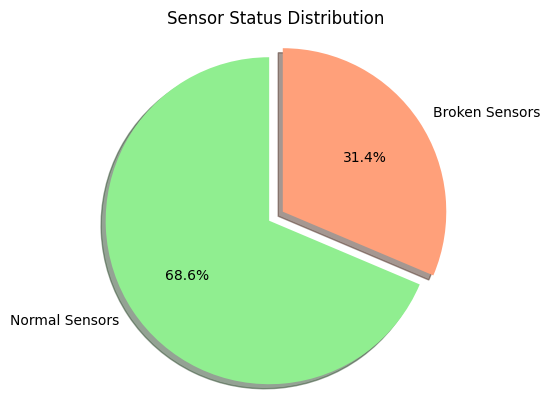

In [4]:
labels = 'Normal Sensors', 'Broken Sensors'
sizes = [normal_percentage, broken_percentage]
colors = ['lightgreen', 'lightsalmon'] 
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Sensor Status Distribution")
plt.savefig('screenshots/pie-chart.png')
plt.show()